In [77]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울공원요약.csv to 서울공원요약 (2).csv


### 1. 데이터 불러오기

In [3]:
park= pd.read_csv(filename)
park.head()

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690,대형,15
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085,대형,15


###2. 자치구별 공원 면적 및 공원수

In [15]:
df= park.groupby(['지역'])['면적'].agg(['sum','count'])
df.head()

,sum,count
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
과천시,9132690,1


In [16]:
df.drop(index='과천시', inplace=True)
df.columns = ['공원면적', '공원수']
df.head()

,공원면적,공원수
지역,,
강남구,3626398,7
강동구,1526390,7
강북구,3714902,4
강서구,2194154,9
관악구,10431453,2


### 3. 공원면적 비율

In [6]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시인구.txt to 서울시인구 (2).txt


In [17]:
seoul_df= pd.read_csv(filename, sep ='\t')[1:]
seoul_df.set_index('지역',inplace=True)
seoul_df.head()

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"
용산구,2020,"244,645",21.87,"11,188"
성동구,2020,"300,505",16.86,"17,822"
광진구,2020,"360,109",17.06,"21,105"


In [18]:
df = df.join(seoul_df[['인구','면적']])     
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,"544,055",39.50
강동구,1526390,7,"463,998",24.59
강북구,3714902,4,"311,569",23.60
강서구,2194154,9,"585,901",41.44
관악구,10431453,2,"509,803",29.57


In [19]:
df['면적']= df.면적 *100000
df['인구']= df.인구.apply(lambda x: int(x.replace(',','')))
df.head()

,공원면적,공원수,인구,면적
지역,,,,
강남구,3626398,7,544055,3950000.0
강동구,1526390,7,463998,2459000.0
강북구,3714902,4,311569,2360000.0
강서구,2194154,9,585901,4144000.0
관악구,10431453,2,509803,2957000.0


In [20]:
df['면적비율']= df.공원면적/ df.면적 *100
df['인당면적']= df.공원면적/df.인구
df.head()

,공원면적,공원수,인구,면적,면적비율,인당면적
지역,,,,,,
강남구,3626398,7,544055,3950000.0,91.807544,6.665499
강동구,1526390,7,463998,2459000.0,62.073607,3.289648
강북구,3714902,4,311569,2360000.0,157.411102,11.923208
강서구,2194154,9,585901,4144000.0,52.947732,3.744923
관악구,10431453,2,509803,2957000.0,352.771491,20.461733


### 4.시각화

* 자치구별 공원면적 비율

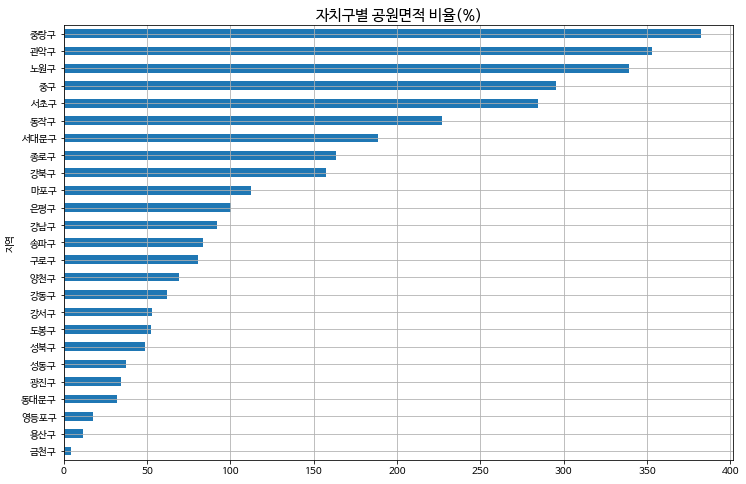

In [21]:
df.면적비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

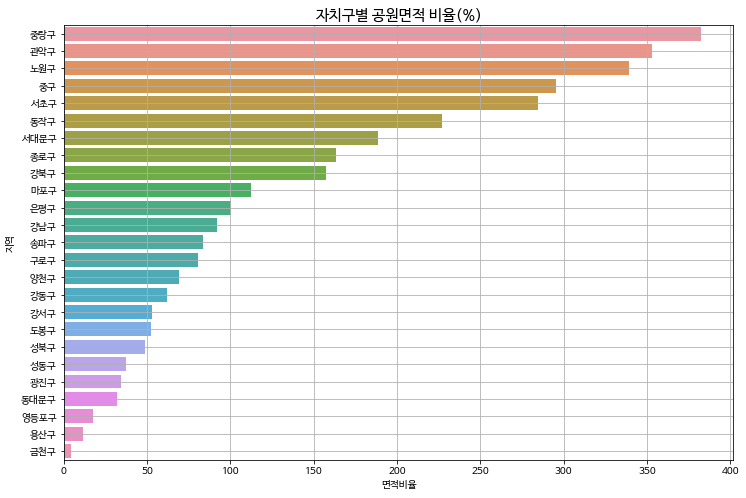

In [23]:
plt.figure(figsize=(12,8))
order = df.면적비율.sort_values(ascending=False).index
sns.barplot(x='면적비율', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 공원면적 비율(%)', size=15)
plt.show()

* 인당 공원 면적

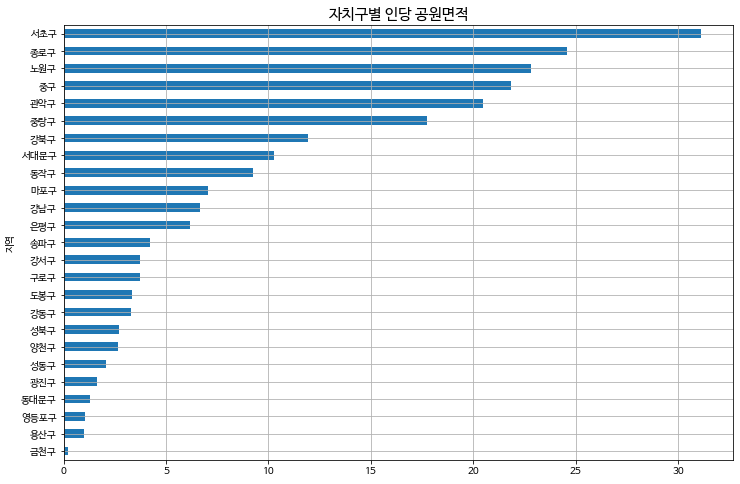

In [24]:
df.인당면적.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 인당 공원면적', size=15)
plt.show()

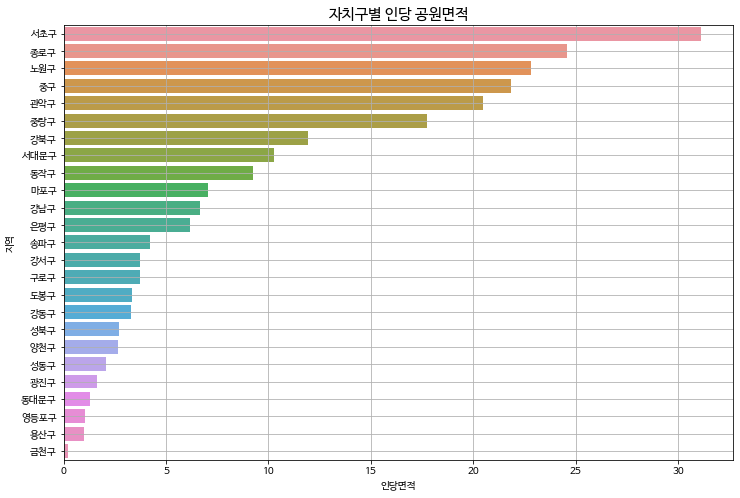

In [25]:
plt.figure(figsize=(12,8))
order= df.인당면적.sort_values(ascending=False).index
sns.barplot(x='인당면적', y=df.index, data=df, order=order)
plt.grid()
plt.title('자치구별 인당 공원면적', size=15)
plt.show()